In [1]:
import torch
import torch.nn.functional as F
torch.cuda.set_device(1)
import models, train, utils
from importlib import reload
reload(models)
reload(train)
reload(utils)

<module 'utils' from '/home/cse/btech/cs1180416/col870-deep-learning/A2/utils.py'>

In [2]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
device

device(type='cuda')

In [3]:
query_X_split = torch.load('data/pt-cache/query_X_split.pt')
query_y = torch.load('data/pt-cache/query_y.pt')

In [4]:
train_X, test_X, train_y, test_y = utils.balanced_split(query_X_split, query_y, test_size=10000)

In [5]:
train_Y = F.one_hot(train_y, num_classes=9).float()
test_Y = F.one_hot(test_y, num_classes=9).float()

In [6]:
gen = models.DigitGenerator()
disc = models.DigitDiscriminator()

In [7]:
gen.dnet.zero_c.load_state_dict(torch.load('data/pt-cache/zero_classifier.pt'))
gen.dnet.lenet.load_state_dict(torch.load('data/pt-cache/lenet.pt'))
disc.dnet.zero_c.load_state_dict(torch.load('data/pt-cache/zero_classifier.pt'))
disc.dnet.lenet.load_state_dict(torch.load('data/pt-cache/lenet.pt'))

IncompatibleKeys(missing_keys=[], unexpected_keys=[])

In [8]:
for p in gen.dnet.zero_c.parameters():
    p.requires_grad = False
for p in disc.dnet.zero_c.parameters():
    p.requires_grad = False

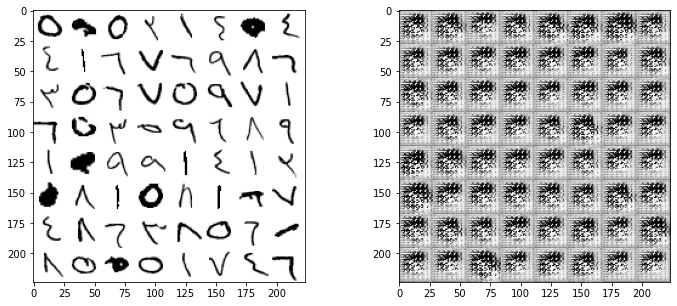

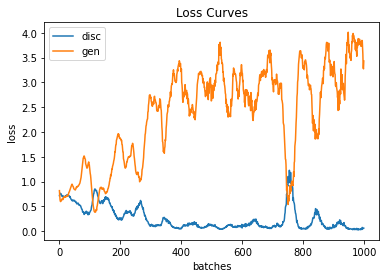

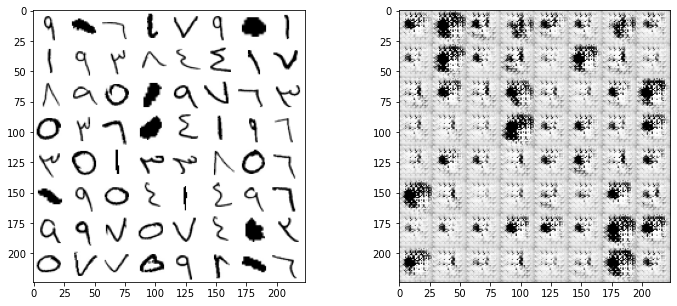

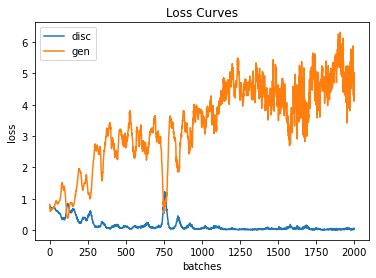

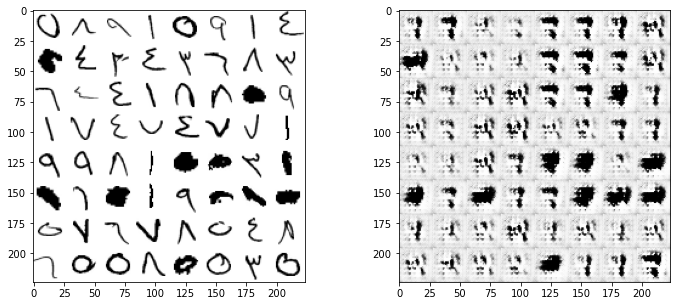

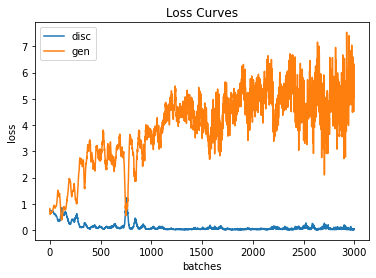

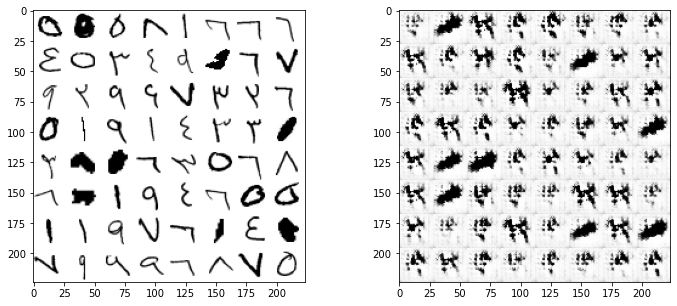

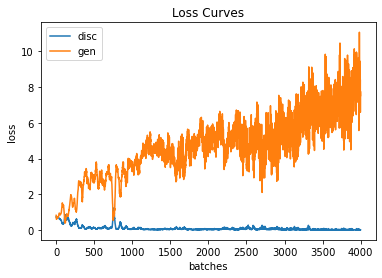

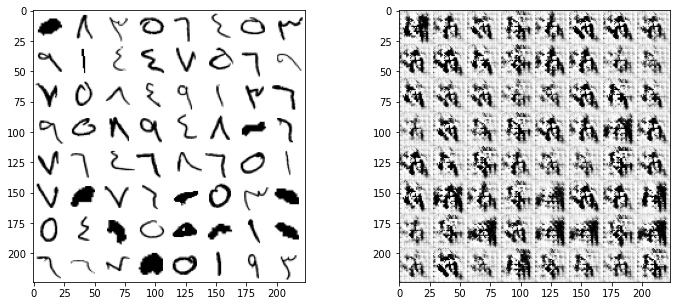

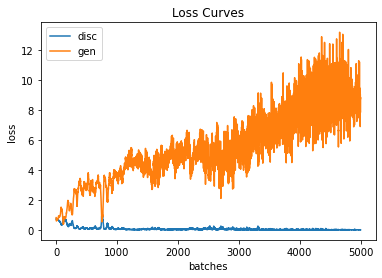

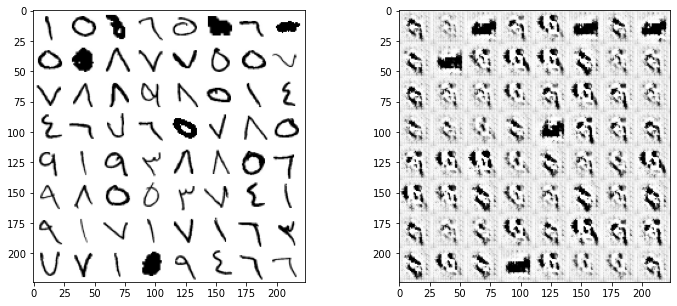

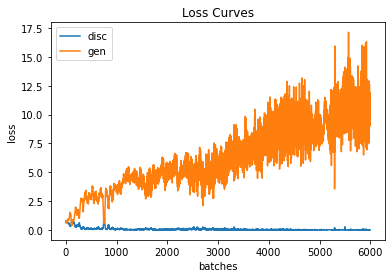

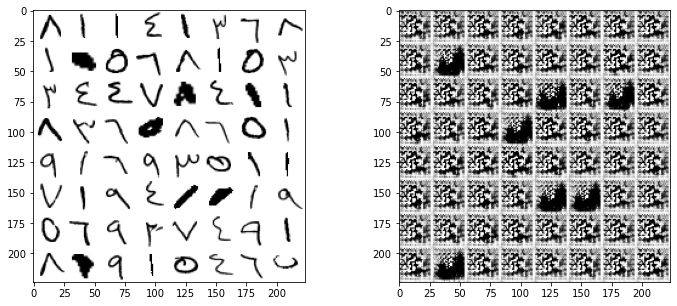

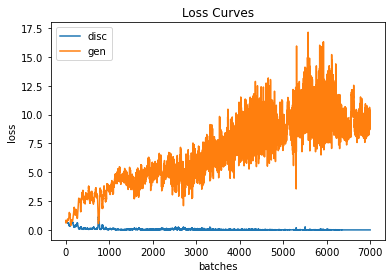

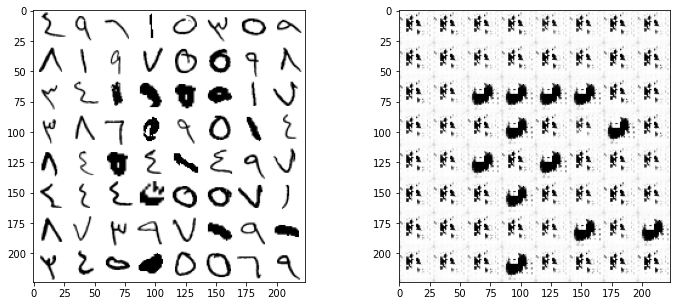

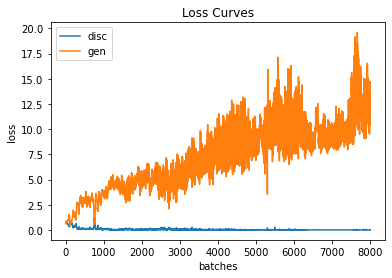

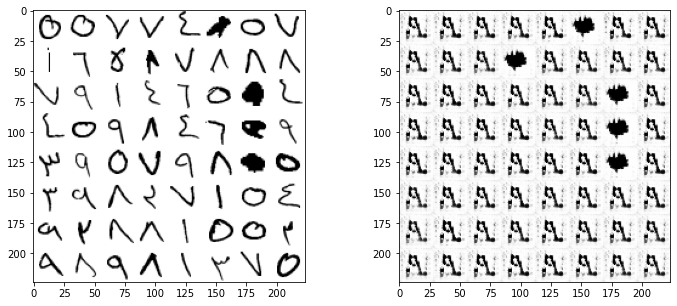

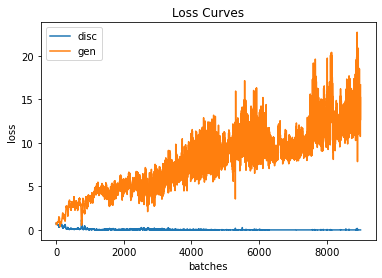

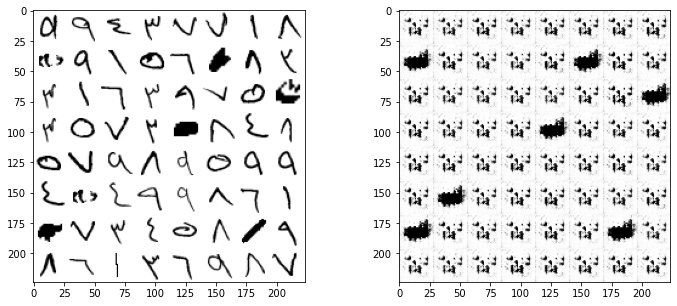

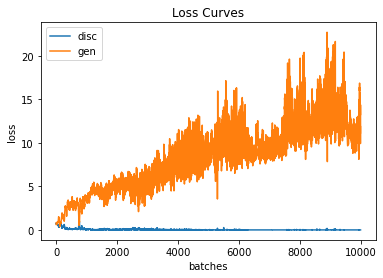

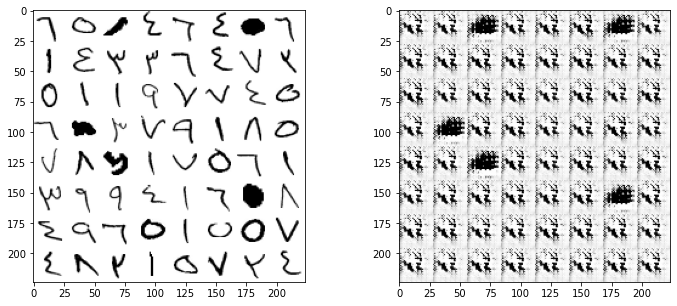

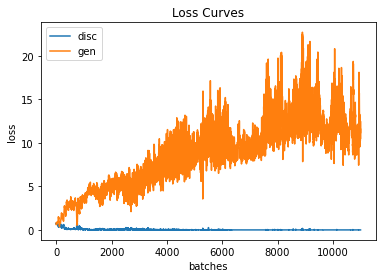

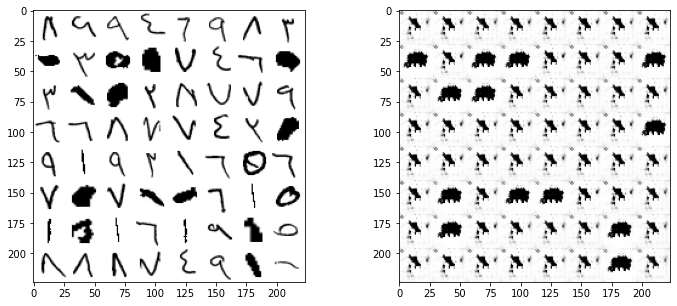

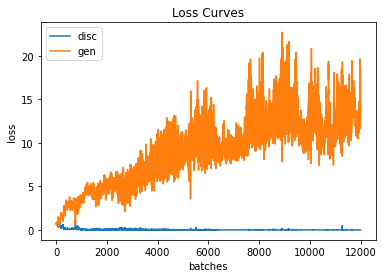

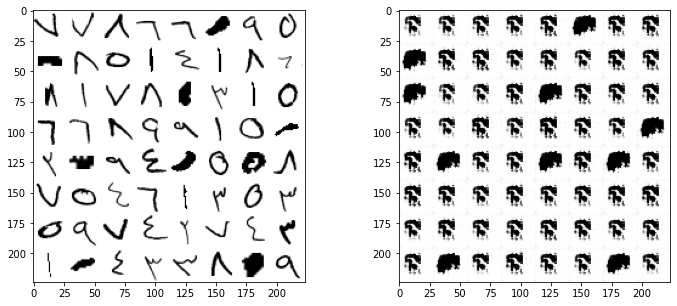

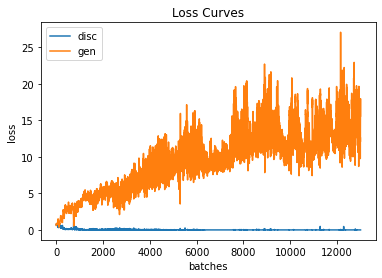

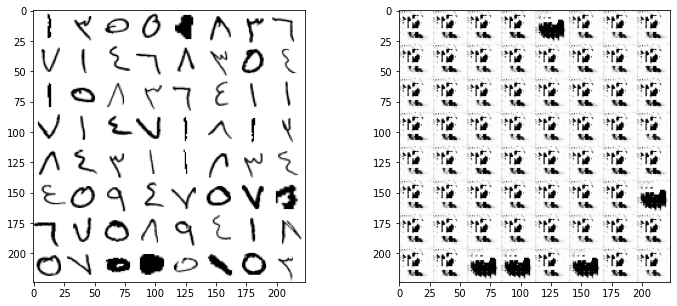

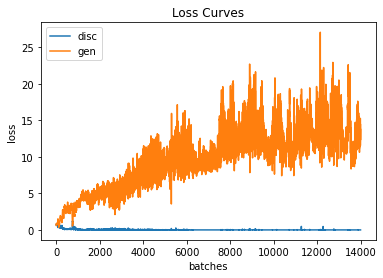

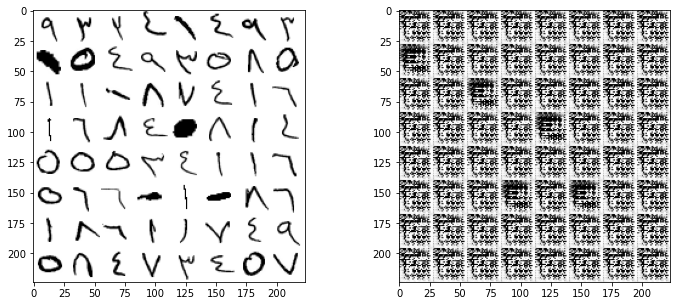

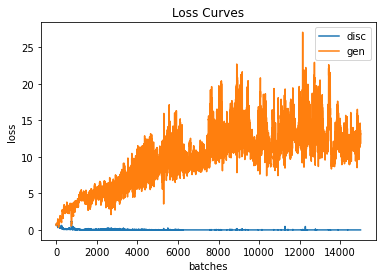

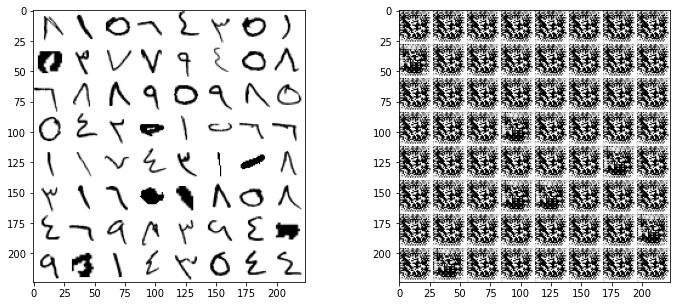

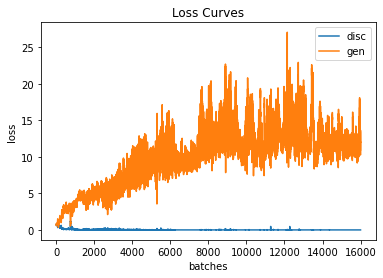

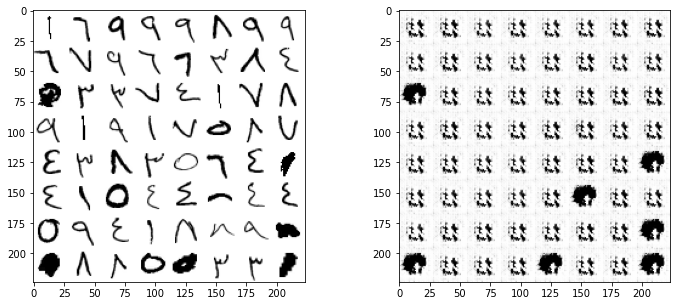

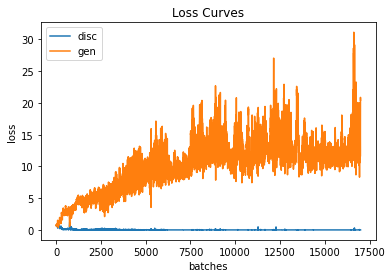

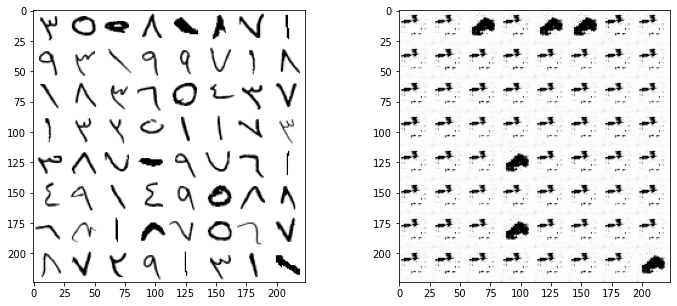

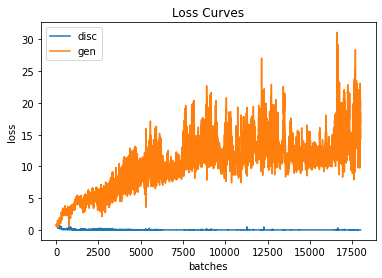

KeyboardInterrupt: 

In [9]:
train.train_gan(train_X, train_X, gen, disc,
                lr=2e-4, batch_size=64, n_epochs=100,
                device=device, show_step=1000)